In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
sys.path.append(r'C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\src')
import os
from GridMetrics import GridScorer, circle_mask, get_even_odd_times, GridParameters, create_new_result_dir, load_grid_metrics_from_pickle
import json
import random
%load_ext autoreload
%autoreload 2

In [2]:
# Set default parameters for matplotlib
plt.rcParams.update({
    'xtick.major.size': 8,
    'ytick.major.size': 8,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14, 
    'axes.titlesize': 16,
    'legend.fontsize': 12,
})


In [3]:
rats = ['q', 'q', 'r1', 'r1', 'r1', 's', 'r2', 'r2']
mods = ['1', '2', '1', '2', '3', '1', '1', '2']
fig_directory  = r'C:\Users\acostamendoza\Box\grid-cell-project\figure_4'

In [4]:
cell_trial_dicts = []
Grid_Session = []
for rat, mod in zip(rats, mods): 
    G, general_results_working_directory, session_results_directory = load_grid_metrics_from_pickle(rat, mod)
    
    with open(general_results_working_directory + '/' + rat + mod + '/' + rat + mod + '_odds-even-30s-no-rejection.json') as f:
        cell_trial_dict = json.load(f)
    
    cell_trial_dicts.append(cell_trial_dict)
    Grid_Session.append(G)

Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\q1 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\q2 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r11 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r12 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r13 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\s1 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r21 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r22 already exists


# 3A: Scatter plot for all cells

In [28]:
def get_delta_mean_differences(cell_trial_dict, G):
    
    accepted = []
    
    for cell in cell_trial_dict:
        none_trials = 0
        for trial in cell_trial_dict[cell]:
            if cell_trial_dict[cell][trial]['spacing_odd'] is None:
                none_trials += 1
            elif cell_trial_dict[cell][trial]['spacing_even'] is None:
                none_trials += 1
                
        if none_trials <= 5:
            accepted.append(cell)
    
    delta_orientation_within_mean = []
    delta_orientation_between_mean = []
    delta_spacing_within_mean = []
    delta_spacing_between_mean = []
    grid_score = []
    
    for cell in accepted:
        grid_score.append(G.grid_scores[int(cell)])
        
        delta_orientation_within = []
        delta_orientation_between = []
        delta_spacing_within = []
        delta_spacing_between = []
        
        for trial in cell_trial_dict[cell]:
            
            if (cell_trial_dict[cell][trial]['spacing_odd'] is not None) and (cell_trial_dict[cell][trial]['spacing_even'] is not None):
            
                delta_orientation_within.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[cell][trial]['orientation_odd']))
                second_cell = random.choice(list(accepted))
                while (cell_trial_dict[second_cell][trial]['spacing_odd'] is None) or (cell_trial_dict[second_cell][trial]['spacing_even'] is None):
                    second_cell = random.choice(list(accepted))
                delta_orientation_between.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[second_cell][trial]['orientation_odd']))
                delta_spacing_within.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[cell][trial]['spacing_odd']))
                delta_spacing_between.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[second_cell][trial]['spacing_odd']))
            
        delta_orientation_within_mean.append(np.mean(delta_orientation_within))
        delta_orientation_between_mean.append(np.mean(delta_orientation_between))
        delta_spacing_within_mean.append(np.mean(delta_spacing_within))
        delta_spacing_between_mean.append(np.mean(delta_spacing_between))
    
    # convert all four variables to arrays
    delta_orientation_within_mean = np.array(delta_orientation_within_mean)
    delta_orientation_between_mean = np.array(delta_orientation_between_mean)
    delta_spacing_within_mean = np.array(delta_spacing_within_mean)
    delta_spacing_between_mean = np.array(delta_spacing_between_mean)
    
    return delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean, grid_score

# Simple Scatter plot

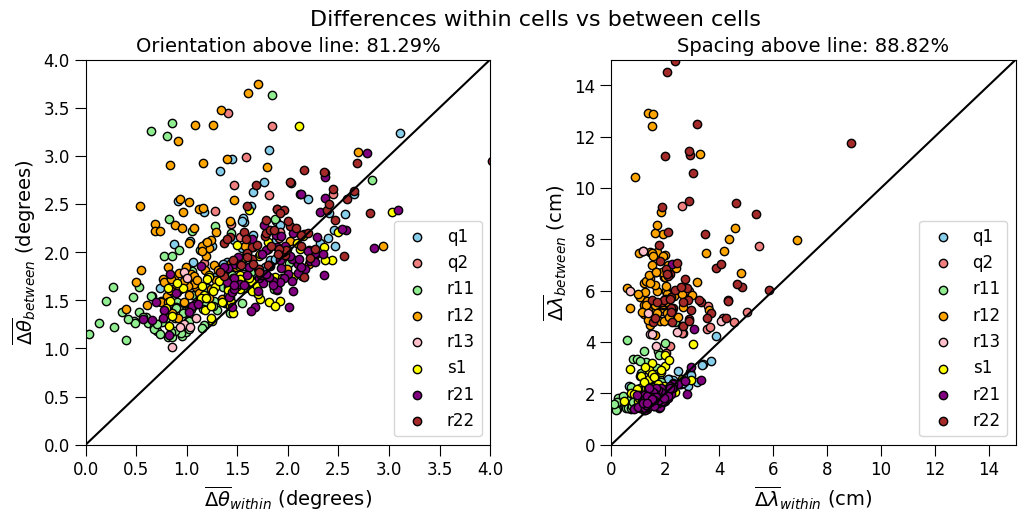

In [112]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.3)
plt.suptitle('Differences within cells vs between cells', fontsize = 16)
# choose as colors as there are entries in cell_trial_dicts
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink', 'yellow', 'purple', 'brown', 'black']

delta_orientation_within_sessions = []
delta_orientation_between_sessions = []
delta_spacing_within_sessions = []
delta_spacing_between_sessions = []
grid_score_session = []

for i, cell_trial_dict in enumerate(cell_trial_dicts):

    delta_orientation_single_cell_mean, delta_orientation_two_cells_mean, delta_spacing_single_cell_mean, delta_spacing_two_cells_mean, grid_score = get_delta_mean_differences(cell_trial_dict, Grid_Session[i])
        
    for element in delta_orientation_single_cell_mean:
        delta_orientation_within_sessions.append(element)
    for element in delta_orientation_two_cells_mean:
        delta_orientation_between_sessions.append(element)
    for element in delta_spacing_single_cell_mean:
        delta_spacing_within_sessions.append(element)
    for element in delta_spacing_two_cells_mean:
        delta_spacing_between_sessions.append(element)
    for element in grid_score:
        grid_score_session.append(element)

    # # convert all four variables to arrays
    delta_orientation_single_cell_mean = np.array(delta_orientation_single_cell_mean)
    delta_orientation_two_cells_mean = np.array(delta_orientation_two_cells_mean)
    delta_spacing_single_cell_mean = np.array(delta_spacing_single_cell_mean)
    delta_spacing_two_cells_mean = np.array(delta_spacing_two_cells_mean)
    
    axes[0].scatter(delta_orientation_single_cell_mean, delta_orientation_two_cells_mean, color=colors[i], edgecolor='black')
    axes[1].scatter(delta_spacing_single_cell_mean, delta_spacing_two_cells_mean, color=colors[i], edgecolor='black')
    
    # add legend so that each color is rat + mod

orientation_count = 0
for between, within in zip(delta_orientation_between_sessions, delta_orientation_within_sessions):
    if between > within:
        orientation_count += 1
        
spacing_count = 0
for between, within in zip(delta_spacing_between_sessions, delta_spacing_within_sessions):
    if between > within:
        spacing_count += 1

orientation_above = orientation_count/ len(delta_orientation_within_sessions)
spacing_above = spacing_count/ len(delta_spacing_within_sessions)
    
# plot scatter plot of orientation
axes[0].set_xlabel(r'$\overline{\Delta\theta}_{within}$ (degrees)')
axes[0].set_ylabel(r'$\overline{\Delta\theta}_{between}$ (degrees)')
axes[0].set_xlim(0, 4)
axes[0].set_ylim(0, 4)
# plot diagonal line
axes[0].plot([0, 4], [0, 4], color='black')
axes[0].legend([rat + mod for rat, mod in zip(rats, mods)], fontsize=12)
axes[0].set_title('Orientation above line: ' + str(round(orientation_above*100, 2)) + '%', fontsize=14)

# add legend so that each color is rat + mod
# axes[0].legend([rat + mod for rat, mod in zip(rats, mods)], fontsize=12)
axes[1].legend([rat + mod for rat, mod in zip(rats, mods)], fontsize=12)
axes[1].set_xlabel(r'$\overline{\Delta\lambda}_{within}$ (cm)')
axes[1].set_ylabel(r'$\overline{\Delta\lambda}_{between}$ (cm)')
axes[1].set_xlim(0, 15)
axes[1].set_ylim(0, 15)
# plot a diagonal line
axes[1].plot([0, 15], [0, 15], color='black')
axes[1].set_title('Spacing above line: ' + str(round(spacing_above*100, 2)) + '%', fontsize=14)

# set all labels to fontsize 14
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    
plt.savefig(fig_directory + '/' + 'A_scatter_within_between.svg', dpi=1200)

In [74]:
# get cells above line
delta_orientation_within_sessions = np.array(delta_orientation_within_sessions)
delta_orientation_between_sessions = np.array(delta_orientation_between_sessions)
delta_spacing_within_sessions = np.array(delta_spacing_within_sessions)
delta_spacing_between_sessions = np.array(delta_spacing_between_sessions)
delta_orientation_within_mean = np.mean(delta_orientation_within_sessions[delta_orientation_between_sessions > delta_orientation_within_sessions])
delta_orientation_between_mean = np.mean(delta_orientation_between_sessions[delta_orientation_between_sessions > delta_orientation_within_sessions])
delta_spacing_within_mean = np.mean(delta_spacing_within_sessions[delta_spacing_between_sessions > delta_spacing_within_sessions])
delta_spacing_between_mean = np.mean(delta_spacing_between_sessions[delta_spacing_between_sessions > delta_spacing_within_sessions])

print('Delta orientation within mean (above line) is ' + str(delta_orientation_within_mean))
print('Delta orientation between mean (above line) is ' + str(delta_orientation_between_mean))
print('Delta spacing within mean (above line) is ' + str(delta_spacing_within_mean))
print('Delta spacing between mean (above line) is ' + str(delta_spacing_between_mean))

# save what you printed to
with open(fig_directory + '/' + 'A_scatter_within_between.txt', 'w') as f:
    f.write('Delta orientation within mean (above line) is ' + str(delta_orientation_within_mean) + '\n')
    f.write('Delta orientation between mean (above line) is ' + str(delta_orientation_between_mean) + '\n')
    f.write('Delta spacing within mean (above line) is ' + str(delta_spacing_within_mean) + '\n')
    f.write('Delta spacing between mean (above line) is ' + str(delta_spacing_between_mean) + '\n')

Delta orientation within mean (above line) is 1.3124270488023342
Delta orientation between mean (above line) is 1.9170110426938043
Delta spacing within mean (above line) is 1.7746576748403242
Delta spacing between mean (above line) is 4.0474688136335795


# Scatter plot of between vs within with histograms

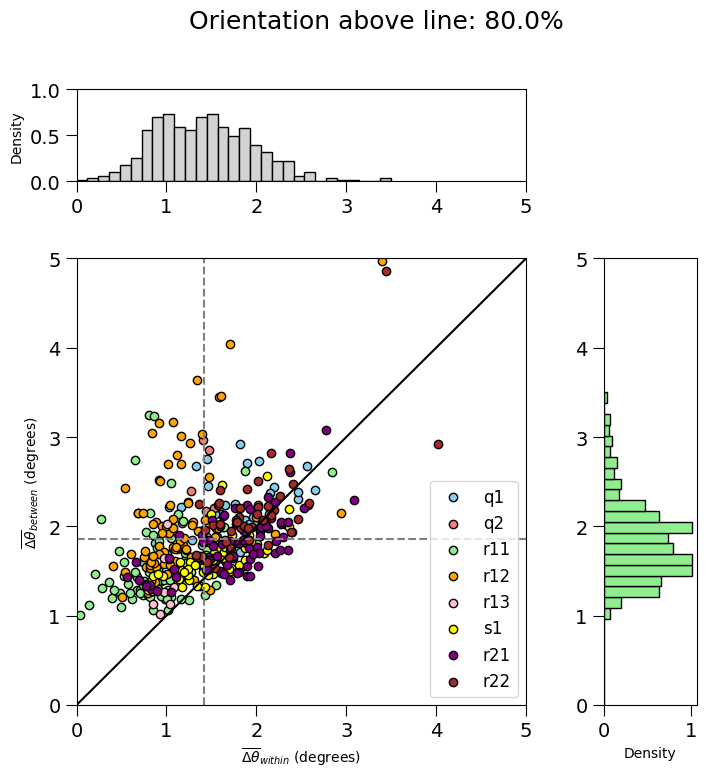

In [29]:
# Create a figure with two subplots
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.5], height_ratios=[0.5, 1, 1])

# add more hspace between subplots
plt.subplots_adjust(hspace=0.5)
# add more wspace betwen subplots
plt.subplots_adjust(wspace=0.5)

ax_joint = fig.add_subplot(gs[1:3, 0:2])
ax_xhist = fig.add_subplot(gs[0, 0:2], sharex=ax_joint)
ax_yhist = fig.add_subplot(gs[1:3, 2], sharey=ax_joint)

# choose as colors as there are entries in cell_trial_dicts
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink', 'yellow', 'purple', 'brown', 'black']

delta_orientation_within_sessions = []
delta_orientation_between_sessions = []
grid_score_session = []

for i, cell_trial_dict in enumerate(cell_trial_dicts):

    delta_orientation_single_cell_mean, delta_orientation_two_cells_mean, delta_spacing_single_cell_mean, delta_spacing_two_cells_mean, grid_score = get_delta_mean_differences(cell_trial_dict, Grid_Session[i])
        
    for element in delta_orientation_single_cell_mean:
        delta_orientation_within_sessions.append(element)
    for element in delta_orientation_two_cells_mean:
        delta_orientation_between_sessions.append(element)

    # # convert all four variables to arrays
    delta_orientation_single_cell_mean = np.array(delta_orientation_single_cell_mean)
    delta_orientation_two_cells_mean = np.array(delta_orientation_two_cells_mean)
    delta_spacing_single_cell_mean = np.array(delta_spacing_single_cell_mean)
    delta_spacing_two_cells_mean = np.array(delta_spacing_two_cells_mean)
    
    ax_joint.scatter(delta_orientation_single_cell_mean, delta_orientation_two_cells_mean, color=colors[i], edgecolor='black')


orientation_count = 0
for between, within in zip(delta_orientation_between_sessions, delta_orientation_within_sessions):
    if between > within:
        orientation_count += 1

orientation_above = orientation_count/ len(delta_orientation_within_sessions)
    
# plot scatter plot of orientation
ax_joint.set_xlabel(r'$\overline{\Delta\theta}_{within}$ (degrees)')
ax_joint.set_ylabel(r'$\overline{\Delta\theta}_{between}$ (degrees)')
ax_joint.set_xlim(0, 5)
ax_joint.set_ylim(0, 5)
# plot vertical line with the mean of within 
ax_joint.axvline(x=np.mean(delta_orientation_within_sessions), color='grey', linestyle='--')
# plot horizontal line with the mean of between
ax_joint.axhline(y=np.mean(delta_orientation_between_sessions), color='grey', linestyle='--')
# plot diagonal line
ax_joint.plot([0, 5], [0, 5], color='black')
ax_joint.legend([rat + mod for rat, mod in zip(rats, mods)], fontsize=12)

# histogram for ax_xhist
ax_xhist.hist(delta_orientation_within_sessions, bins=np.linspace(0, 3.5, 30), color='lightgray', edgecolor='black', density = True)
ax_xhist.set_ylabel('Density')
# set xlim to 0 to 1
ax_xhist.set_ylim(0, 1)

# histogram for ax_yhist
ax_yhist.hist(delta_orientation_between_sessions, bins=np.linspace(0, 3.5, 30), color='lightgreen', edgecolor='black', density = True, orientation='horizontal')
ax_yhist.set_xlabel('Density')
# set ylim to 0 to 1

plt.suptitle('Orientation above line: ' + str(round(orientation_above*100, 2)) + '%', fontsize=18)

# save figure as svg with the name between orientation vs grid score
plt.savefig(fig_directory + '/' + 'A_orientation_within_between.svg', dpi=1200)

# save also in png
plt.savefig(fig_directory + '/' + 'A_orientation_within_between.png', dpi=1200)

In [30]:
# print the means
print('The mean of delta orientation within is ' + str(np.mean(delta_orientation_within_sessions)))
print('The mean of delta orientation between is ' + str(np.mean(delta_orientation_between_sessions)))

The mean of delta orientation within is 1.4219688521348468
The mean of delta orientation between is 1.8564157211034626


In [31]:
# Run Wilcoxon test to see if the differences are significant
from scipy.stats import wilcoxon
stat, p = wilcoxon(delta_orientation_within_sessions, delta_orientation_between_sessions)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# print the number of samples
print('The number of samples is ' + str(len(delta_orientation_within_sessions)))


Statistics=10003.000, p=0.000
The number of samples is 420


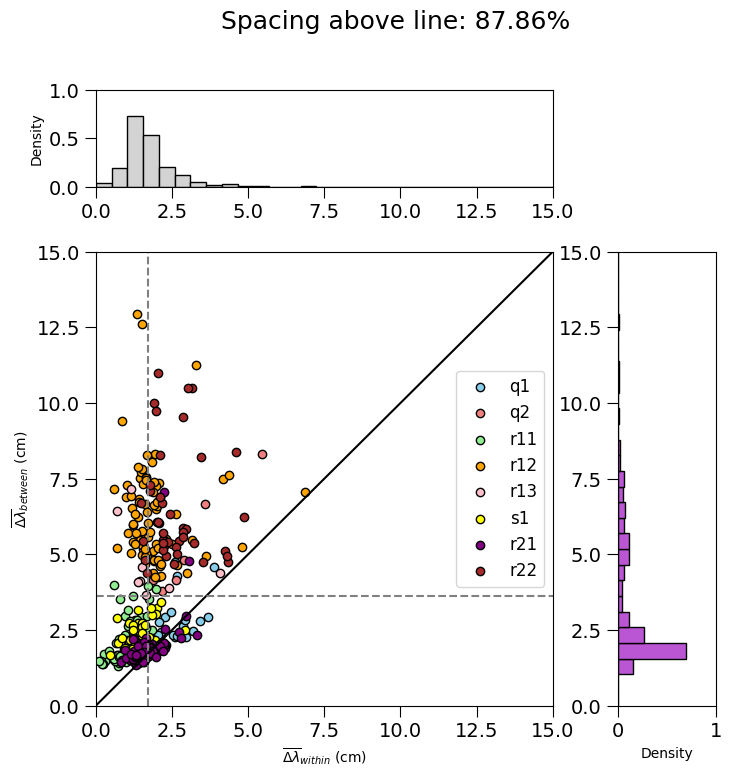

In [32]:
# do the same but for spacing
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.5], height_ratios=[0.5, 1, 1])

# add more hspace between subplots
plt.subplots_adjust(hspace=0.4)
# add more wspace betwen subplots
plt.subplots_adjust(wspace=0.4)

ax_joint = fig.add_subplot(gs[1:3, 0:2])
ax_xhist = fig.add_subplot(gs[0, 0:2], sharex=ax_joint)
ax_yhist = fig.add_subplot(gs[1:3, 2], sharey=ax_joint)

# choose as colors as there are entries in cell_trial_dicts
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink', 'yellow', 'purple', 'brown', 'black']

delta_spacing_within_sessions = []
delta_spacing_between_sessions = []

for i, cell_trial_dict in enumerate(cell_trial_dicts):

    delta_orientation_single_cell_mean, delta_orientation_two_cells_mean, delta_spacing_single_cell_mean, delta_spacing_two_cells_mean, grid_score = get_delta_mean_differences(cell_trial_dict, Grid_Session[i])
        
    for element in delta_spacing_single_cell_mean:
        delta_spacing_within_sessions.append(element)
    for element in delta_spacing_two_cells_mean:
        delta_spacing_between_sessions.append(element)

    # # convert all four variables to arrays
    delta_orientation_single_cell_mean = np.array(delta_orientation_single_cell_mean)
    delta_orientation_two_cells_mean = np.array(delta_orientation_two_cells_mean)
    delta_spacing_single_cell_mean = np.array(delta_spacing_single_cell_mean)
    delta_spacing_two_cells_mean = np.array(delta_spacing_two_cells_mean)
    
    ax_joint.scatter(delta_spacing_single_cell_mean, delta_spacing_two_cells_mean, color=colors[i], edgecolor='black')
    
spacing_count = 0
for between, within in zip(delta_spacing_between_sessions, delta_spacing_within_sessions):
    if between > within:
        spacing_count += 1

spacing_above = spacing_count/ len(delta_spacing_within_sessions)

# plot scatter plot of orientation
ax_joint.set_xlabel(r'$\overline{\Delta\lambda}_{within}$ (cm)')
ax_joint.set_ylabel(r'$\overline{\Delta\lambda}_{between}$ (cm)')
ax_joint.set_xlim(0, 15)
ax_joint.set_ylim(0, 15)
# plot diagonal line
ax_joint.plot([0, 15], [0, 15], color='black')
ax_joint.legend([rat + mod for rat, mod in zip(rats, mods)], fontsize=12)

# plot vertical line with the mean of within
ax_joint.axvline(x=np.mean(delta_spacing_within_sessions), color='grey', linestyle='--')
# plot horizontal line with the mean of between
ax_joint.axhline(y=np.mean(delta_spacing_between_sessions), color='grey', linestyle='--')

# histogram for ax_xhist
ax_xhist.hist(delta_spacing_within_sessions, bins=np.linspace(0, 15, 30), color='lightgray', edgecolor='black', density = True)
ax_xhist.set_ylabel('Density')
# set xlim to 0 to 1
ax_xhist.set_ylim(0, 1)


# histogram for ax_yhist
ax_yhist.hist(delta_spacing_between_sessions, bins=np.linspace(0, 15, 30), color='mediumorchid',edgecolor='black', density = True, orientation='horizontal')
ax_yhist.set_xlabel('Density')
# set ylim to 0 to 1
ax_yhist.set_xlim(0, 1)

# set the axis ax_yhist and ax_xhist to be from 0 to 15 in 7 ticks
ax_yhist.set_yticks(np.linspace(0, 15, 7))
ax_xhist.set_xticks(np.linspace(0, 15, 7))

plt.suptitle('Spacing above line: ' + str(round(spacing_above*100, 2)) + '%', fontsize=18)

# save figure as svg with the name between orientation vs grid score
plt.savefig(fig_directory + '/' + 'A_spacing_within_between.svg', dpi=1200)

# save also in png
plt.savefig(fig_directory + '/' + 'A_spacing_within_between.png', dpi=1200)


In [33]:
# print the means
print('The mean of delta spacing within is ' + str(np.mean(delta_spacing_within_sessions)))
print('The mean of delta spacing between is ' + str(np.mean(delta_spacing_between_sessions)))

The mean of delta spacing within is 1.7256252677952197
The mean of delta spacing between is 3.6098852288583854


# Scatter plot of between vs grid score

The slope is 0.1651378285271516
The intercept is 1.737390793643028
The r_value is 0.0683770005030317
The p_value is 0.14095961345649013
The std_err is 0.11197688816846627


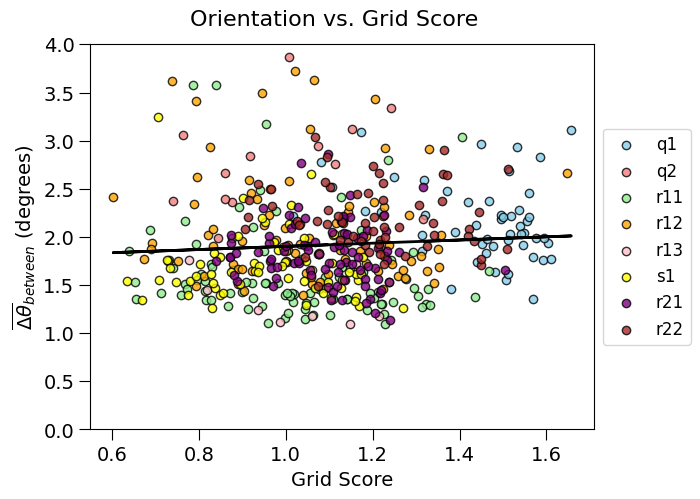

In [68]:
# plt.scatter(grid_score_session, delta_orientation_within_sessions, color = 'lightgrey', s= 30, edgecolor='grey')
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink', 'yellow', 'purple', 'brown', 'black']
plt.subplots(1, 1, figsize = (6.5, 5))

for i, cell_trial_dict in enumerate(cell_trial_dicts):
    delta_orientation_single_cell_mean, delta_orientation_two_cells_mean, delta_spacing_single_cell_mean, delta_spacing_two_cells_mean, grid_score = get_delta_mean_differences(cell_trial_dict, Grid_Session[i])
    plt.scatter(grid_score, delta_orientation_two_cells_mean, color = colors[i], alpha = 0.8, edgecolor='black')

from scipy.stats import linregress

# do the same for between
slope, intercept, r_value, p_value, std_err = linregress(grid_score_session, delta_orientation_between_sessions)
print('The slope is ' + str(slope))
print('The intercept is ' + str(intercept))
print('The r_value is ' + str(r_value))
print('The p_value is ' + str(p_value))
print('The std_err is ' + str(std_err))

# # plot the line

plt.plot(grid_score_session, slope * grid_score_session + intercept, color = 'black', linewidth = 2)
plt.suptitle('Orientation vs. Grid Score', y = 0.95, fontsize = 16)
# place to the right
plt.legend([rat + mod for rat, mod in zip(rats, mods)], fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 4)

# add x label
plt.xlabel('Grid Score')
# add y label
plt.ylabel(r'$\overline{\Delta\theta}_{between}$ (degrees)')

# # add regression params to the figure
# plt.text(1.1, 3.5, 'slope: ' + str(round(slope, 2)), fontsize=12)

# save figure as svg with the name between orientation vs grid score
plt.savefig(fig_directory + '/' + 'B_grid_score_vs_orientation.svg', dpi=1200)

# save also in png
plt.savefig(fig_directory + '/' + 'B_grid_score_vs_orientation.png', dpi=1200)

# save what you printed to
with open(fig_directory + '/' + 'B_grid_score_vs_orientation.txt', 'w') as f:
    f.write('The slope is ' + str(slope) + '\n')
    f.write('The intercept is ' + str(intercept) + '\n')
    f.write('The r_value is ' + str(r_value) + '\n')
    f.write('The p_value is ' + str(p_value) + '\n')
    f.write('The std_err is ' + str(std_err) + '\n')

The slope is 0.373104212823492
The intercept is 3.4149738611650813
The r_value is 0.02795663935082436
The p_value is 0.547608234933573
The std_err is 0.6199903222372112


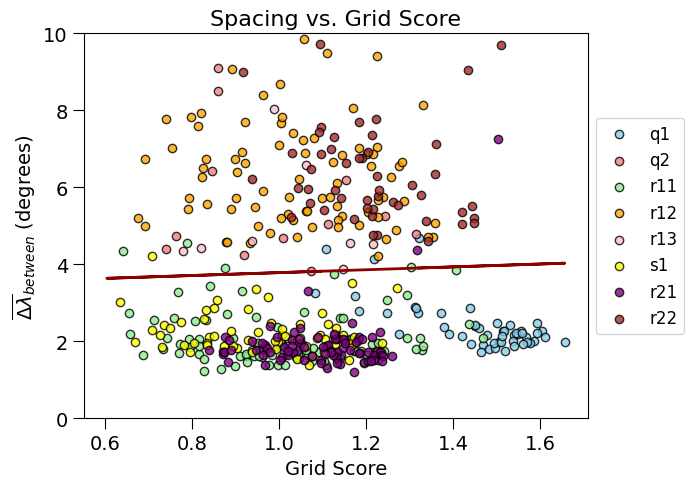

In [70]:
# make the same as the last cell bt for spacing
plt.subplots(1, 1, figsize = (6.5, 5))



for i, cell_trial_dict in enumerate(cell_trial_dicts):
    delta_orientation_single_cell_mean, delta_orientation_two_cells_mean, delta_spacing_single_cell_mean, delta_spacing_two_cells_mean, grid_score = get_delta_mean_differences(cell_trial_dict, Grid_Session[i])
    plt.scatter(grid_score, delta_spacing_two_cells_mean, color = colors[i], alpha = 0.8, edgecolor='black')

from scipy.stats import linregress

# do the same for between
slope, intercept, r_value, p_value, std_err = linregress(grid_score_session, delta_spacing_between_sessions)
print('The slope is ' + str(slope))
print('The intercept is ' + str(intercept))
print('The r_value is ' + str(r_value))
print('The p_value is ' + str(p_value))
print('The std_err is ' + str(std_err))

# plot the line
plt.plot(grid_score_session, slope * grid_score_session + intercept, color = 'darkred', linewidth = 2)
plt.title('Spacing vs. Grid Score', )
plt.ylim(0, 10)

plt.title('Spacing vs. Grid Score', fontsize = 16)
plt.legend([rat + mod for rat, mod in zip(rats, mods)], fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# add x label
plt.xlabel('Grid Score')
# add y label
plt.ylabel(r'$\overline{\Delta\lambda}_{between}$ (degrees)')

# # add regression params to the figure
# plt.text(1.1, 3.5, 'slope: ' + str(round(slope, 2)), fontsize=12)

# save figure as svg with the name between orientation vs grid score
plt.savefig(fig_directory + '/' + 'B_grid_score_vs_spacing.svg', dpi=1200)

# save also in png
plt.savefig(fig_directory + '/' + 'B_grid_score_vs_spacing.png', dpi=1200)

# save what you printed to
with open(fig_directory + '/' + 'B_grid_score_vs_spacing.txt', 'w') as f:
    f.write('The slope is ' + str(slope) + '\n')
    f.write('The intercept is ' + str(intercept) + '\n')
    f.write('The r_value is ' + str(r_value) + '\n')
    f.write('The p_value is ' + str(p_value) + '\n')
    f.write('The std_err is ' + str(std_err) + '\n')

# Witin and between vs binned grid scored [discarded]

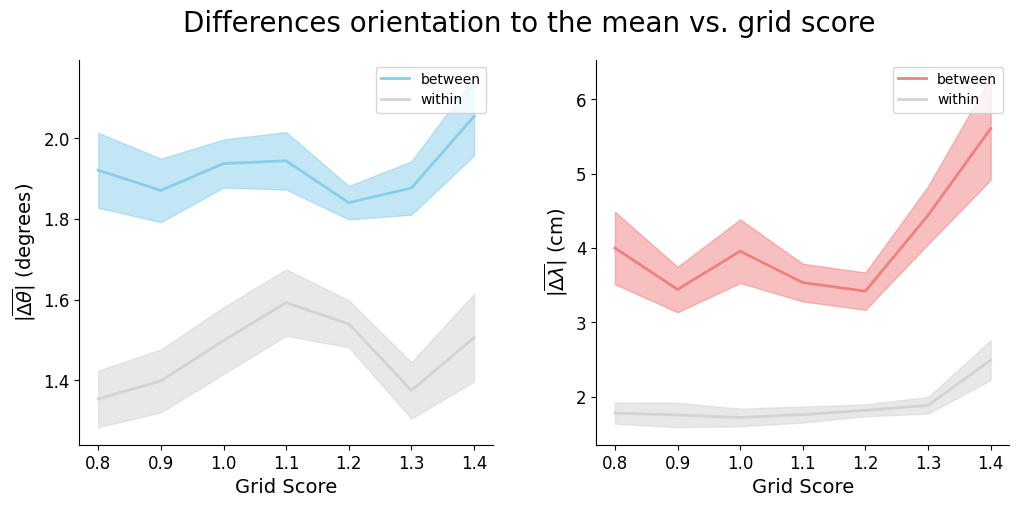

In [6]:
# plot the std deviation in orientation and spacing vs the grid score of every binb
delta_orientation_within_sessions = np.array(delta_orientation_within_sessions)
delta_orientation_between_sessions = np.array(delta_orientation_between_sessions)
delta_spacing_within_sessions = np.array(delta_spacing_within_sessions)
delta_spacing_between_sessions = np.array(delta_spacing_between_sessions)

bins = np.linspace(0.8, 1.4, 7)
digitized = np.digitize(grid_score_session, bins)

# count how many cells in each bin
bin_counts = np.zeros_like(bins)
bin_delta_orientation = np.zeros_like(bins)
bin_delta_spacing = np.zeros_like(bins)

bin_within_orientation = []
bin_between_orientation = []
bin_between_orientation_sem = []
bin_within_orientation_sem = []

bin_within_spacing = []
bin_between_spacing = []
bin_between_spacing_sem = []
bin_within_spacing_sem = []

for i in range(0, len(bins)):
    
    bin_within_orientation.append(delta_orientation_within_sessions[digitized == i].mean())
    bin_within_orientation_sem.append(delta_orientation_within_sessions[digitized == i].std() / np.sqrt(len(delta_orientation_within_sessions[digitized == i])))
    bin_between_orientation.append(delta_orientation_between_sessions[digitized == i].mean())
    bin_between_orientation_sem.append(delta_orientation_between_sessions[digitized == i].std() / np.sqrt(len(delta_orientation_between_sessions[digitized == i])))
    
    bin_within_spacing.append(delta_spacing_within_sessions[digitized == i].mean())
    bin_within_spacing_sem.append(delta_spacing_within_sessions[digitized == i].std() / np.sqrt(len(delta_spacing_within_sessions[digitized == i])))
    bin_between_spacing.append(delta_spacing_between_sessions[digitized == i].mean())
    bin_between_spacing_sem.append(delta_spacing_between_sessions[digitized == i].std() / np.sqrt(len(delta_spacing_between_sessions[digitized == i])))
    
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# make some space between subplots
fig.subplots_adjust(wspace=0.25)
# set fig title
fig.suptitle('Differences orientation to the mean vs. grid score', fontsize=20)

axes[0].plot(bins, bin_between_orientation, label = 'between', color='skyblue', linewidth=2, markersize=14)
axes[0].fill_between(bins, np.array(bin_between_orientation) - np.array(bin_between_orientation_sem), np.array(bin_between_orientation) + np.array(bin_between_orientation_sem), color='skyblue', alpha=0.5)
axes[0].plot(bins, bin_within_orientation, label = 'within', color='lightgray', linewidth=2, markersize=14)
axes[0].fill_between(bins, np.array(bin_within_orientation) - np.array(bin_within_orientation_sem), np.array(bin_within_orientation) + np.array(bin_within_orientation_sem), color='lightgray', alpha=0.5)
axes[0].set_xlabel('Grid Score')
axes[0].set_ylabel(r'|$\overline{\Delta\theta}$| (degrees)')
axes[0].legend()

axes[1].plot(bins, bin_between_spacing, label = 'between',color='lightcoral', linewidth=2, markersize=12)
axes[1].fill_between(bins, np.array(bin_between_spacing) - np.array(bin_between_spacing_sem), np.array(bin_between_spacing) + np.array(bin_between_spacing_sem), color='lightcoral', alpha=0.5)
axes[1].plot(bins, bin_within_spacing, label = 'within', color='lightgray', linewidth=2, markersize=12)
axes[1].fill_between(bins, np.array(bin_within_spacing) - np.array(bin_within_spacing_sem), np.array(bin_within_spacing) + np.array(bin_within_spacing_sem), color='lightgray', alpha=0.5)
axes[1].set_xlabel('Grid Score')
axes[1].set_ylabel(r'|$\overline{\Delta\lambda}$| (cm)')
axes[1].legend()

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    # remove top and right splines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.savefig(fig_directory + '/' + 'B_grid_score_vs_differences.svg', dpi=1200)

<Figure size 640x480 with 0 Axes>

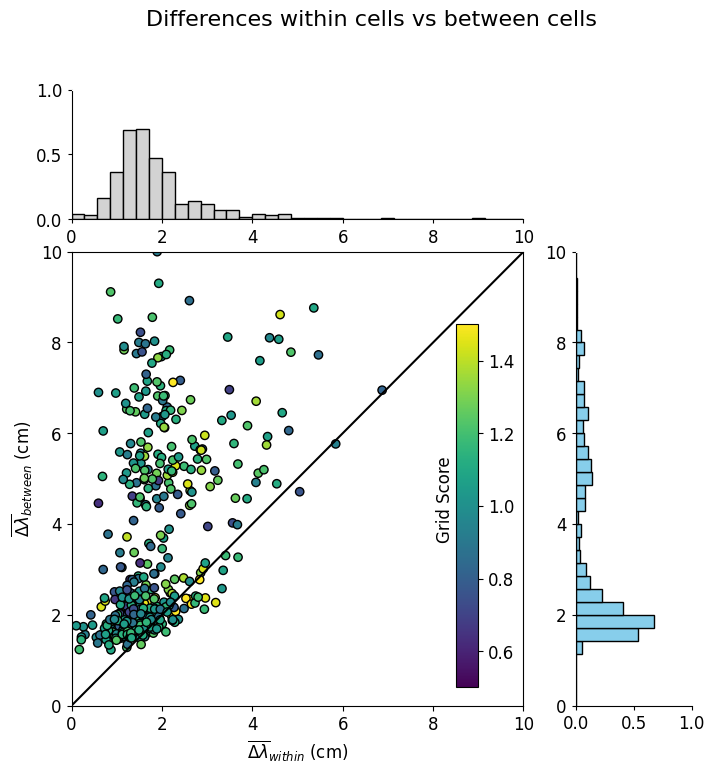

In [71]:
bin_between_orientation_std